In [15]:
from __future__ import print_function
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


df = pd.read_csv('features_data.csv')
final_feature = pd.read_csv('features_for_mcleaing.csv')
final_feature_array = final_feature.to_numpy()
y = df.race.values
X_train, X_test, y_train, y_test = train_test_split(final_feature_array, y, test_size=0.2)

In [16]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt


race_names = np.unique(df.race.values)
plt.rcParams.update({'font.size': 16})
def DrawROC(testdata, y_s):
    y_test_binarized = label_binarize(testdata, classes=np.unique(df.race.values))
    n_classes = y_test_binarized.shape[1]
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_s[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    plt.figure(figsize=(10, 8))
    colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightgreen', 'lightblue']
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of {0} (area = {1:0.2f})'.format(race_names[i], roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multi-class ROC')
    plt.legend(loc="lower right")
    plt.show()


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix

def plot_confusion_matrix(cm):
    class_names = df['race'].unique().tolist()   # 请根据您的实际情况修改类别名
    plt.figure(figsize=(10, 7))  # 设置图形的大小
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def print_res(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    y_score = model.predict_proba(X_test)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)    
    cm = confusion_matrix(y_test,y_pred)
    print(cm)
    plot_confusion_matrix(cm)    
    DrawROC(y_test,y_score)
    return  cm

 # convert dataframe

In [19]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(33100, 3537)
(33100,)
(8276, 3537)
(8276,)


Accuracy: 0.7514499758337361
Precision: 0.7611680167813771
Recall: 0.7514499758337361
F1 Score: 0.722397041581432
[[1336    0    9   39    0    0]
 [  31  634   29  191  394   78]
 [   0    0 1413    0    0    0]
 [   0    0   21 1348    0    0]
 [  45   34   11   93 1158    8]
 [  36  441   16  151  430  330]]


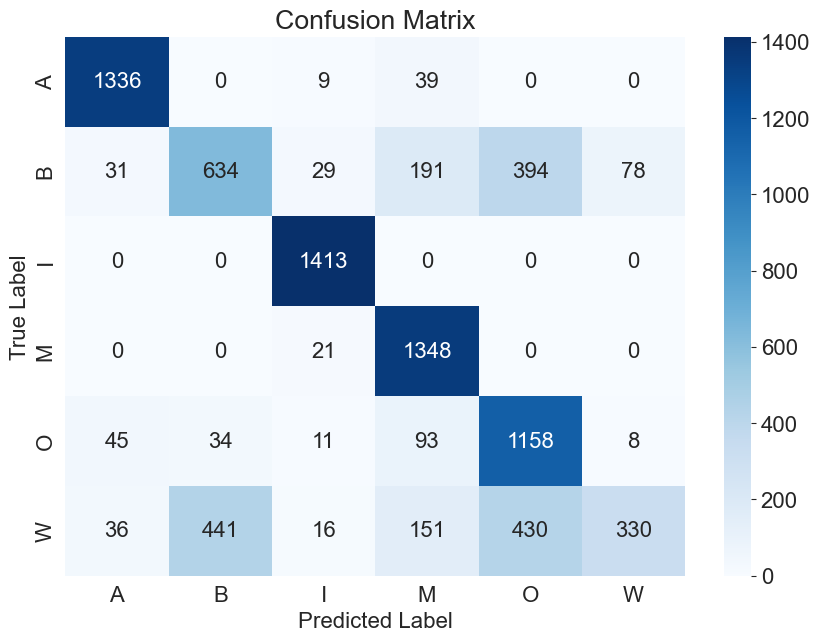

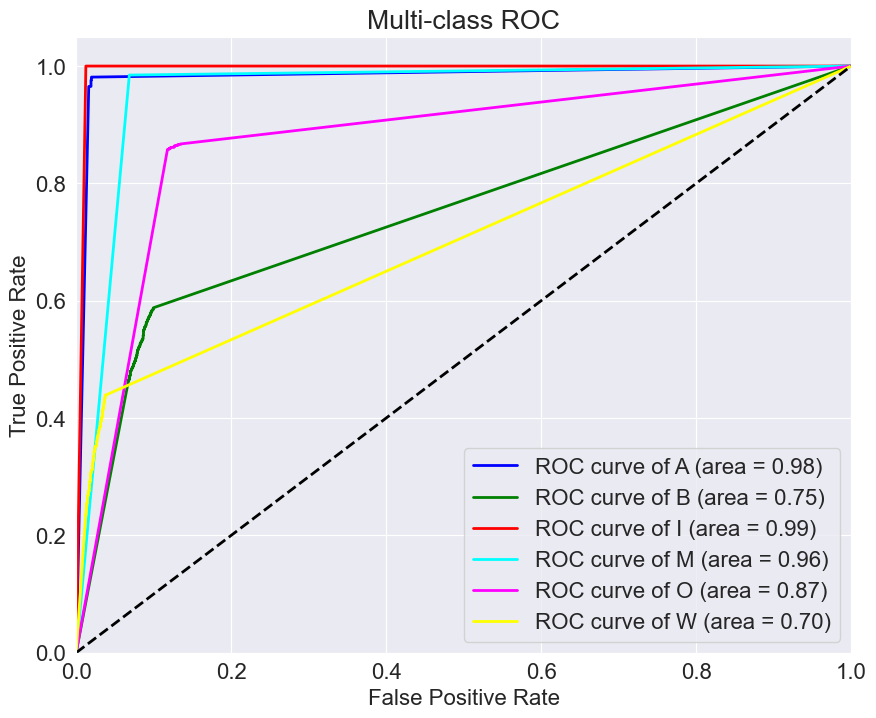

In [20]:
from sklearn.naive_bayes import GaussianNB
model1 = GaussianNB()
result1 =print_res(model1)

Accuracy: 0.750241662638956
Precision: 0.7518850803719458
Recall: 0.750241662638956
F1 Score: 0.7503191030276511
[[1189   56   25   19   40   55]
 [  18  806   57   98   49  329]
 [   0    0 1377    0   14   22]
 [  20  138   25  989  129   68]
 [  47  112   15   53 1008  114]
 [  30  305   46   96   87  840]]


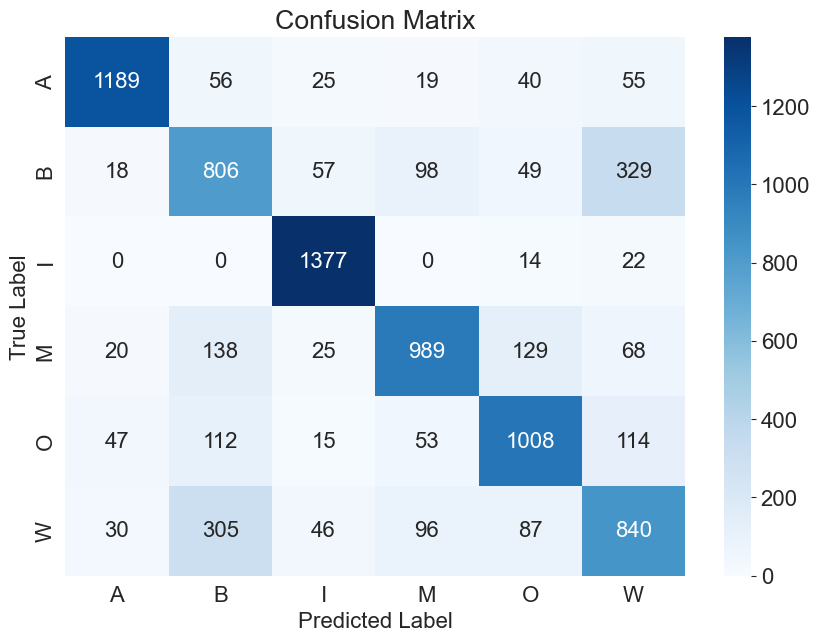

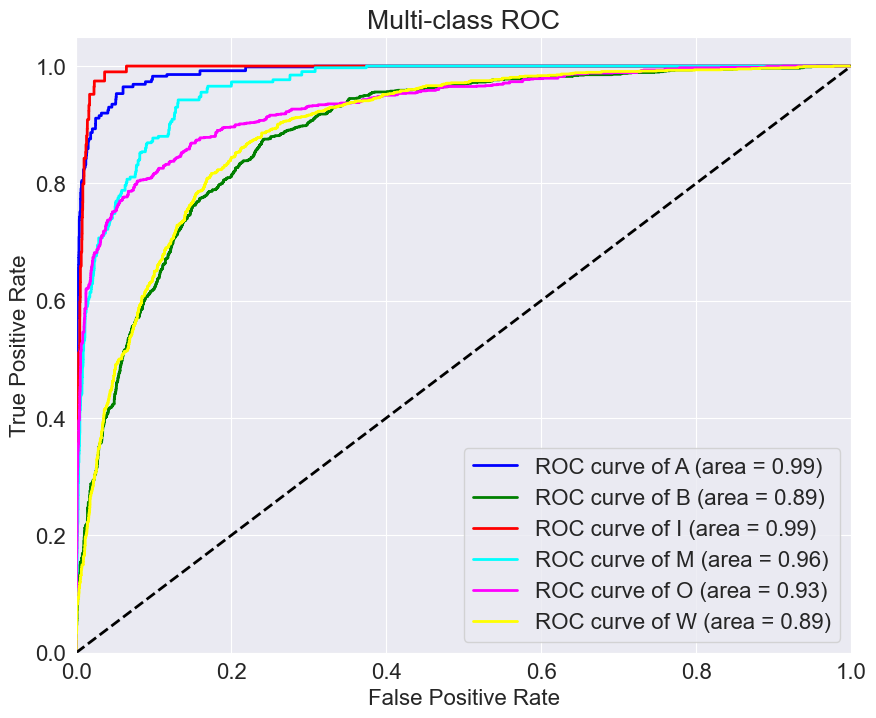

In [21]:
from sklearn.naive_bayes import MultinomialNB
nbm = MultinomialNB()
cm_mul =print_res(nbm)

Accuracy: 0.8539149347510875
Precision: 0.8445119321509574
Recall: 0.8539149347510875
F1 Score: 0.848225321528906
[[1384    0    0    0    0    0]
 [  13  785   18   34   66  441]
 [   0    0 1413    0    0    0]
 [   0    0    0 1369    0    0]
 [   2    8    0    4 1324   11]
 [  18  462   14   26   92  792]]


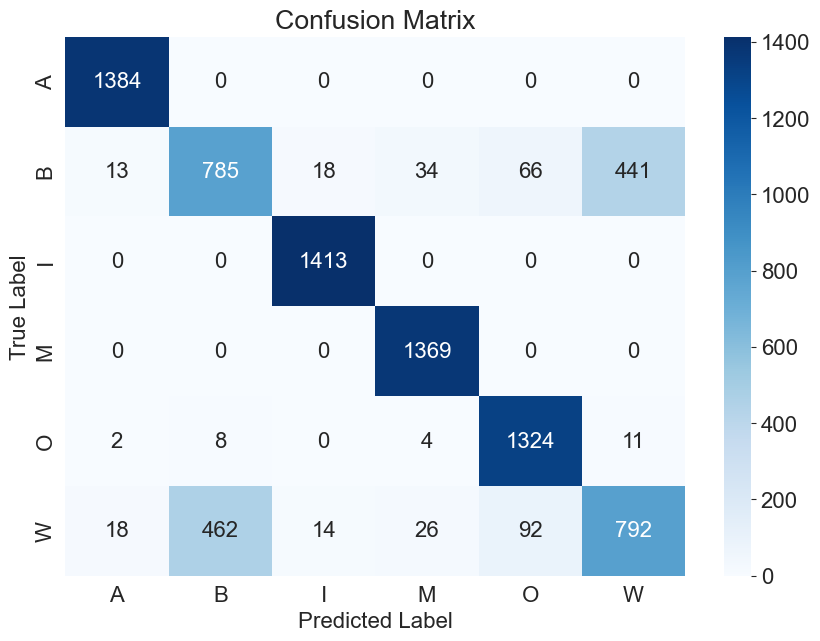

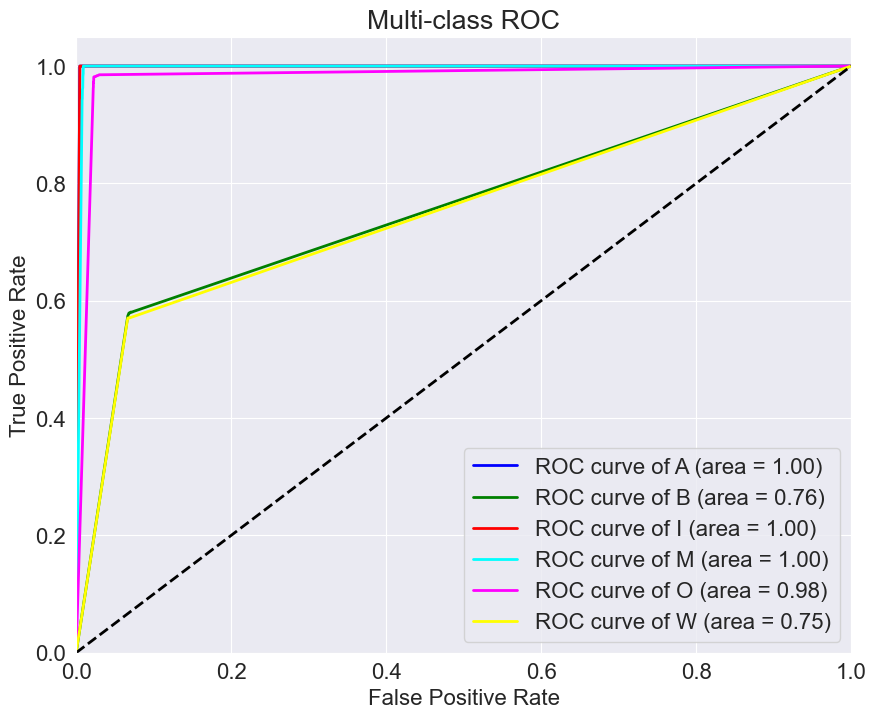

array([[1384,    0,    0,    0,    0,    0],
       [  13,  785,   18,   34,   66,  441],
       [   0,    0, 1413,    0,    0,    0],
       [   0,    0,    0, 1369,    0,    0],
       [   2,    8,    0,    4, 1324,   11],
       [  18,  462,   14,   26,   92,  792]], dtype=int64)

In [22]:
from sklearn.tree import DecisionTreeClassifier
dclf = DecisionTreeClassifier()
print_res(dclf)

C:\yjf\software\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8666022232962783
Precision: 0.8599169990778502
Recall: 0.8666022232962783
F1 Score: 0.8620800042654692
[[1384    0    0    0    0    0]
 [   8  871   16   81   70  311]
 [   0    0 1413    0    0    0]
 [   0    0    0 1369    0    0]
 [   3   55    0   13 1236   42]
 [  17  309   24   63   92  899]]


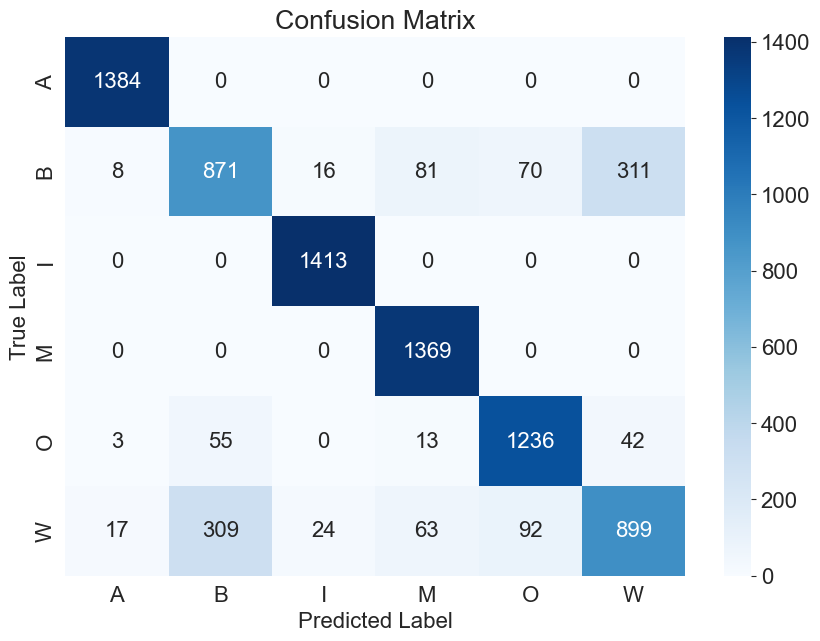

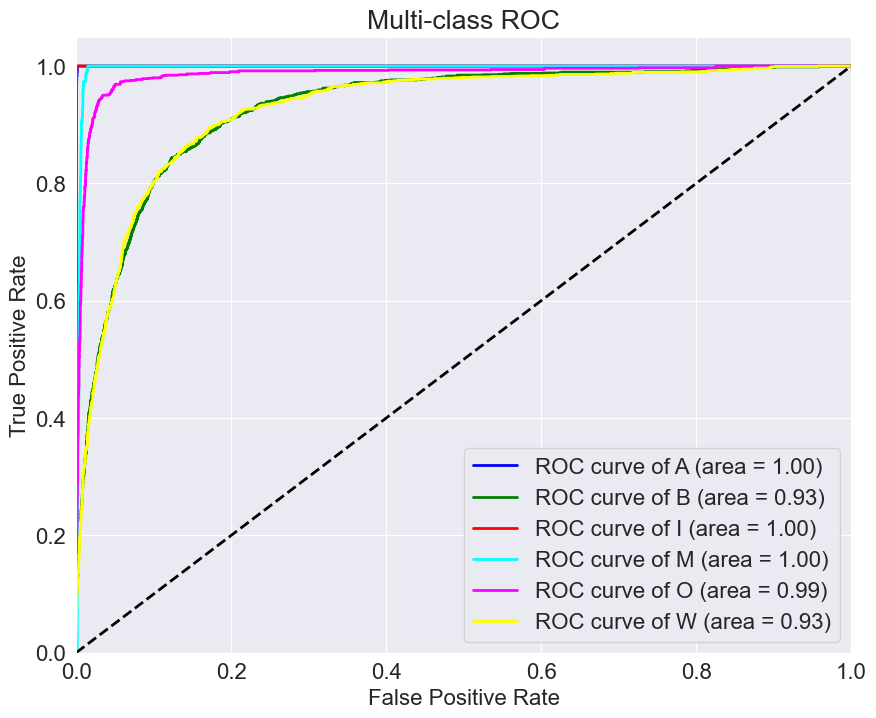

In [23]:
from sklearn.linear_model import LogisticRegression
X_test2 = print_res(LogisticRegression())